In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mplt

In [2]:
#不显示warn信息
import warnings
import missingno as msno
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
newline = '\n'
color = "\033[0;31m%s\033[0m"
forward_color = "\033[1;31;40m"
backward_color = "\033[0m"

In [4]:
def build_bar_graph(x_feature,y_mean,error_bar_std,x_label,y_label,title):
    _,ax = plt.subplots()
    ax.bar(range(len(x_feature)),y_mean,color='#539caf', align = 'center')#此处不能直接使用x_feature,应用数字类型len(x_feature)
    ax.errorbar(range(len(x_feature)),y_mean,yerr=error_bar_std,color = 'darkred', ls = 'none', lw = 5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.setp(ax,xticks=range(len(x_feature)),xticklabels=x_feature)

In [5]:
def bulid_line_graph(x,y,x_lable,y_lable,title,marker):
    if isinstance(x[0], str):
        x_str = x
        x = range(len(x))
        plt.xticks(x, x_str, rotation=45)
    plt.xlabel(x_lable,fontsize=20)
    plt.ylabel(y_lable,fontsize=20)
    plt.title(title,fontsize=25)
    plt.plot(x,y,marker=marker)
    plt.show()

In [6]:
def build_box_plot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': 'r'}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': 'r', 'facecolor': 'b'}
               # 猫须颜色whisker
               , whiskerprops = {'color': 'b'}
               # 猫须界限颜色whisker cap
               , capprops = {'color': 'b'}
               , sym='ro')
               

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [7]:
def show_special_text(text):
    return forward_color+str(text)+backward_color

In [8]:
def see_columns_detail_1(data,columns):
    if len(columns) <= 100:
        for column in columns:
            see_column_detail(data,column)

In [9]:
def see_columns_detail(data):
    if len(data.columns) <= 100:
        for column in data.columns:
            see_column_detail(data,column)

In [10]:
def see_column_detail(data,column):
    print('------------',column,'列详情---------------')
    #查看该列的数据类型
    print(column,'数据类型是：',show_special_text(data[column].dtype))

    #查看该列共有多少种取值个数
    cols_possible_value_count = data[column].value_counts().count()
    print(column,'共有',show_special_text(cols_possible_value_count),'种取值',newline)

    print(column,'每个取值有分布情况-----')
    if cols_possible_value_count <= 15:
        print(data[column].value_counts())
    else:
        print(data[column].value_counts().head(15))
    print(newline)
    print(column,'共有',show_special_text(data[column].isnull().sum()),'个缺失值')
    print(newline)

In [11]:
def glance_data(data):
    print('-----查看数据的前五行----')
    print(data.head(),newline)
    print('-----查看数据是否有缺失值，类型，记录的总数----')
    data.info()
    print(newline)
    print('-----查看数据缺失值情况--------')
    print(data.isnull().sum())

In [31]:
def build_scatter_graph(x,y,x_lable,y_lable,title):

    if isinstance(x[0], str):
        x_str = x
        x = range(len(x))
        plt.xticks(x, x_str, rotation=45)
    
    plt.scatter(x,y)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.title(title)
    plt.show()

In [12]:
train = pd.read_csv('./data/train.csv')
glance_data(train)

-----查看数据的前五行----
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1   

-----查看数据是否有缺失值，类型，记录的总数----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-n

In [13]:
see_columns_detail(train)

------------ datetime 列详情---------------
datetime 数据类型是： object
datetime 共有 10886 种取值 

datetime 每个取值有分布情况-----
2011-11-07 03:00:00    1
2011-06-11 05:00:00    1
2012-02-14 21:00:00    1
2012-12-16 11:00:00    1
2011-08-11 15:00:00    1
2012-07-10 07:00:00    1
2011-12-01 18:00:00    1
2012-11-13 02:00:00    1
2012-03-01 03:00:00    1
2012-05-15 23:00:00    1
2012-11-01 23:00:00    1
2011-09-07 15:00:00    1
2012-05-17 12:00:00    1
2011-05-04 01:00:00    1
2012-08-02 10:00:00    1
Name: datetime, dtype: int64


datetime 共有 0 个缺失值


------------ season 列详情---------------
season 数据类型是： int64
season 共有 4 种取值 

season 每个取值有分布情况-----
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


season 共有 0 个缺失值


------------ holiday 列详情---------------
holiday 数据类型是： int64
holiday 共有 2 种取值 

holiday 每个取值有分布情况-----
0    10575
1      311
Name: holiday, dtype: int64


holiday 共有 0 个缺失值


------------ workingday 列详情---------------
workingday 数据类型是： int64
workingday 共有 2 种取值 

workingday

#### 由info()和detail函数，我们可以看到每列没有缺失值

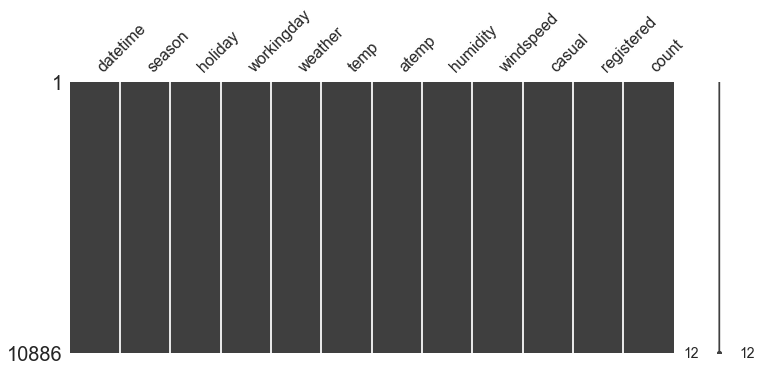

In [14]:
msno.matrix(train,figsize=(12,5))

#### 对时间进行处理

In [15]:
# 把月、日、和 小时单独拎出来，放到3列中
train['month'] = pd.DatetimeIndex(train.datetime).month
train['day'] = pd.DatetimeIndex(train.datetime).dayofweek
train['hour'] = pd.DatetimeIndex(train.datetime).hour

In [16]:
train_origin = train
del train['datetime']

In [17]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


In [18]:
see_columns_detail_1(train,['hour','day','month'])

------------ hour 列详情---------------
hour 数据类型是： int64
hour 共有 24 种取值 

hour 每个取值有分布情况-----
23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
Name: hour, dtype: int64


hour 共有 0 个缺失值


------------ day 列详情---------------
day 数据类型是： int64
day 共有 7 种取值 

day 每个取值有分布情况-----
5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: day, dtype: int64


day 共有 0 个缺失值


------------ month 列详情---------------
month 数据类型是： int64
month 共有 12 种取值 

month 每个取值有分布情况-----
7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64


month 共有 0 个缺失值




#### 查看count的分布情况

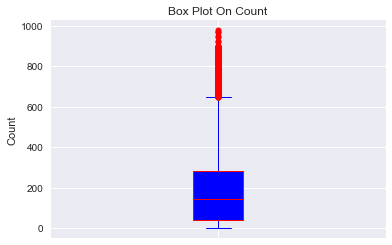

In [19]:
y_data = train['count']
x=''
x_label = ''
y_label = 'Count'
title = 'Box Plot On Count'
build_box_plot(x,y_data,x_label,y_label,title)

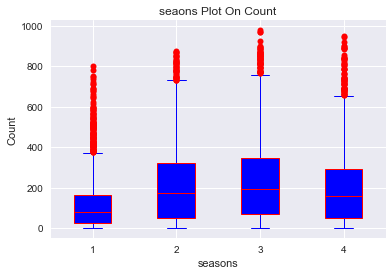

In [20]:
seasons = np.unique(train['season'])
y_data = []
for season in seasons:
    y_data.append(train[train['season'] == season]['count'].values)
x_label = 'seasons'
y_label = 'Count'
title = 'seaons Plot On Count'
build_box_plot(seasons,y_data,x_label,y_label,title)

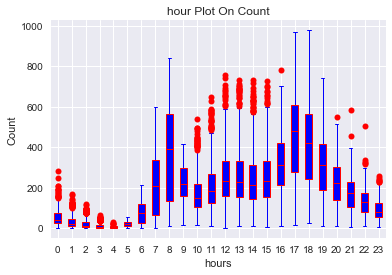

In [21]:
hours = np.unique(train['hour'])
y_data = []
for hour in hours:
    y_data.append(train[train['hour'] == hour]['count'].values)
x_label = 'hours'
y_label = 'Count'
title = 'hour Plot On Count'
build_box_plot(hours,y_data,x_label,y_label,title)

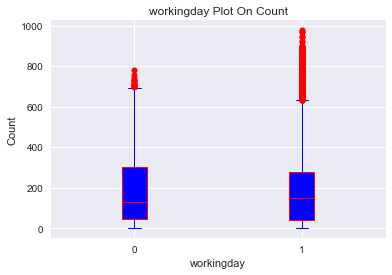

In [22]:
workingdays = np.unique(train['workingday'])
y_data = []
for workingday in workingdays:
    y_data.append(train[train['workingday'] == workingday]['count'].values)
x_label = 'workingday'
y_label = 'Count'
title = 'workingday Plot On Count'
build_box_plot(workingdays,y_data,x_label,y_label,title)

##### 公式参考链接https://www.zhihu.com/question/56784594

In [23]:
trainWithoutOutliers = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

### 相关性分析

* 温度和湿度特征分别与计数呈正相关和负相关。虽然它们之间的相关性不是很突出，但计数变量对“温度”和“湿度”的依赖性很小。
* windspeed不会是真正有用的数字特征，它可以从它的相关值与“count”
* “atemp”是可变的，因为“atemp”和“temp”之间有很强的相关性，所以不会被引入。
在模型建立过程中，任何一个变量都必须被删除，因为它们会在数据中表现出多重共线性。<br>
* “随意”和“注册”也没有考虑到，因为它们本质上是泄漏变量，在建模时需要丢弃。

多重共线性：
* **定义**多个(至少两个)特征之间有较强的线性关系，这种关系若超过了，因变量与自变量的线性关系，则回归模型稳定性会受到破坏，回归系数不准确
* **客观性**在多元回归中，多重共线性是不可避免的，但是只要没有超过自变量与因变量之间的线性关系即可
* **解决方法**只保留多个特征之间的一个/转换自变量的取值(如将绝对数变为相对数/平均数)/更换模型
* **表象** 当未解决多重共线性，会导致参数估计方差大，t统计值变小
* **判定方法** <br>
 kelin判别方法：变量间的相关系数>多重可决系数R^2 则认为两个变量相关性有害<br>
* 关于R^2描述https://www.cnblogs.com/hzc2012/p/8358302.html  http://wiki.mbalib.com/wiki/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%88%86%E6%9E%90%E9%A2%84%E6%B5%8B%E6%B3%95
* 参考书籍：<br>
  市场调查与预测<br>
  中国经济增长与通膨坐标系<br>
   价格指数理论与调整方法<br>

#### 自变量的选择
建立多元性回归模型时，为了保证回归模型具有优良的解释能力和预测效果，应首先注意自变量的选择，其准则是：<br>

　　(1)自变量对因变量必须有显著的影响，并呈密切的线性相关；<br>

　　(2)自变量与因变量之间的线性相关必须是真实的，而不是形式上的；<br>

　　(3)自变量之间应具有一定的互斥性，即自变量之间的相关程度不应高于自变量与因变量之因的相关程度；<br>

　　(4)自变量应具有完整的统计数据，其预测值容易确定。<br>

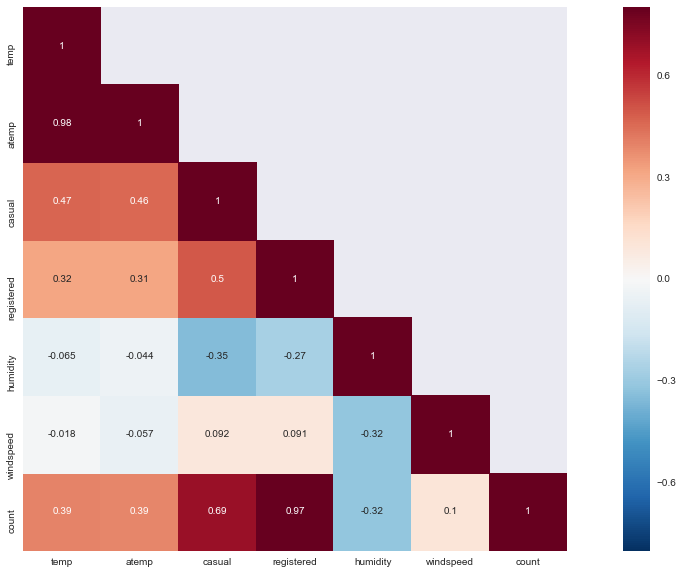

In [24]:
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

#### 可视化数据的分布
* 因为从下图可以看出“count”变量向右倾斜。
* 大多数机器学习技术要求因变量是正常的，所以希望具有正态分布。
* 可能的解决方案是在移除异常数据点之后对“count”变量进行日志转换。
* 后的数据看起来好多了，但仍然不是理想的正态分布。

#### 对数据可视化正态分布调整
* 参考链接 http://www.afenxi.com/post/20707
* qq图参考链接 http://www.cnblogs.com/king-lps/p/7840268.html

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([ 0.69314718,  0.69314718,  0.69314718, ...,  6.5971457 ,
          6.59850903,  6.5998705 ])),
 (1.3486990121229776, 4.5624238680878078, 0.95811767809096116))

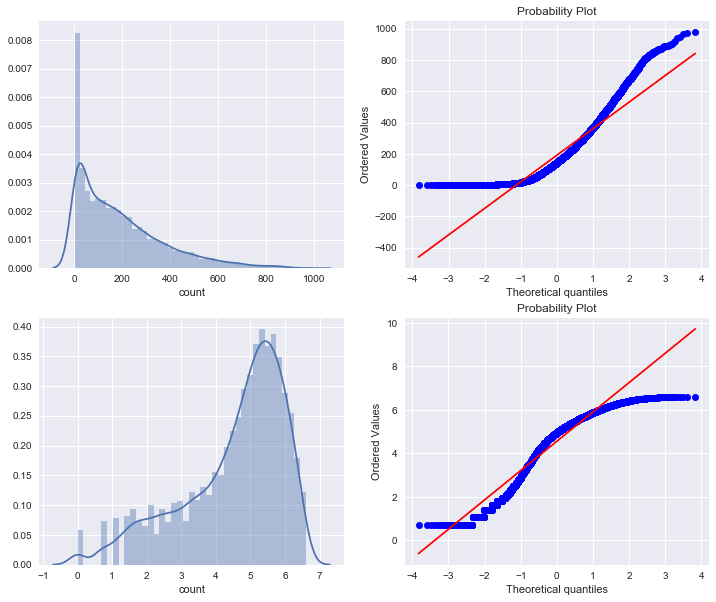

In [25]:
from scipy import stats
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

### count **vs**（月，季，小时，工作日，用户类型）可视化

 None]

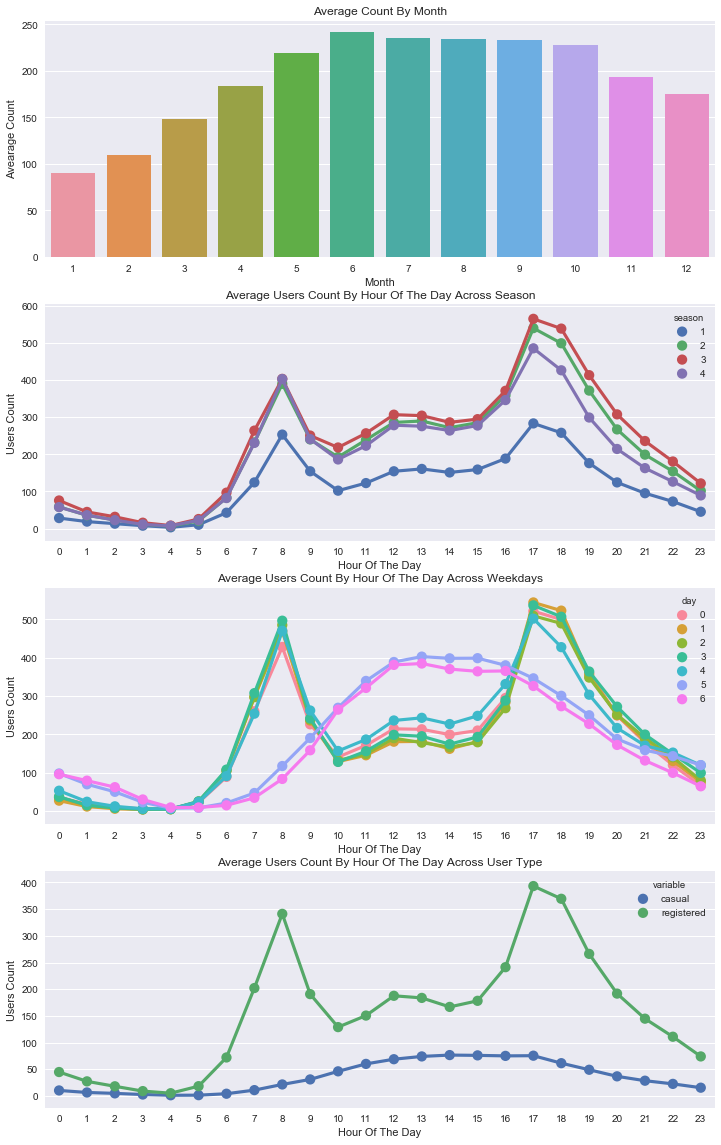

In [26]:
days = np.unique(train['day'])
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)

monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=np.unique(train['month']))
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")



hourAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


hourAggregated = pd.DataFrame(train.groupby(["hour","day"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["day"],hue_order=np.unique(train['day']), data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')